# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 設定 data_path
dir_data = '../../Data/Part01/'

In [5]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../../Data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [19]:
#1
"""
Your code here
"""
cut_rule = [0, 1, 3, 5, 999]
print(pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, right=False, include_lowest=True))

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, right=False, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

[[0, 1), [0, 1), [0, 1), [0, 1), [0, 1), ..., [0, 1), [0, 1), [0, 1), [0, 1), [0, 1)]
Length: 307511
Categories (4, interval[int64]): [[0, 1) < [1, 3) < [3, 5) < [5, 999)]


[0, 1)      215371
[1, 3)       87868
[3, 5)        4146
[5, 999)       126
Name: CNT_CHILDREN_GROUP, dtype: int64

In [20]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[0, 1)              0         166747.010980
                    1         160804.210548
[1, 3)              0         174590.584401
                    1         176115.362720
[3, 5)              0         175057.123091
                    1         159848.673123
[5, 999)            0         164170.636364
                    1         192937.500000
Name: AMT_INCOME_TOTAL, dtype: float64

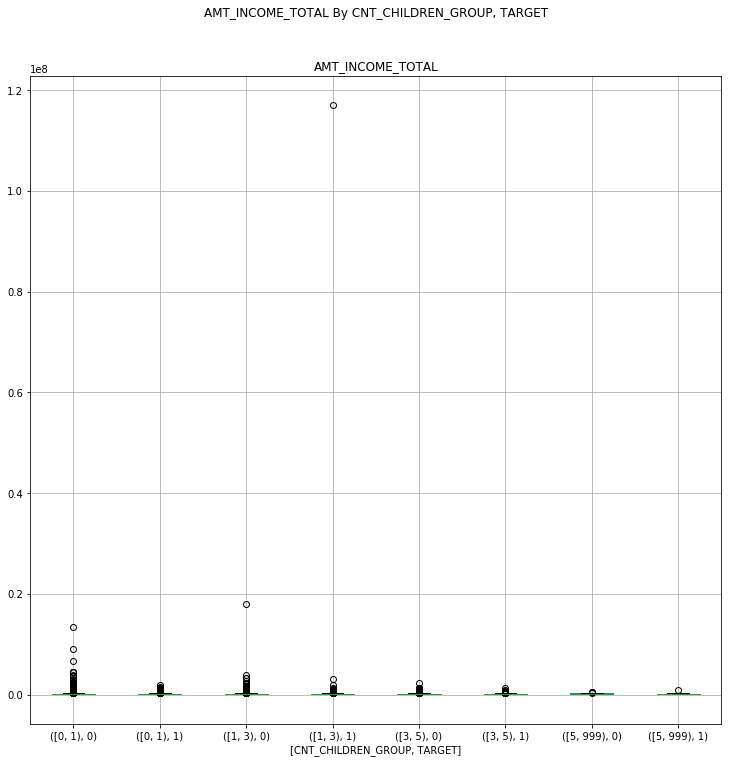

In [36]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL By CNT_CHILDREN_GROUP, TARGET')
plt.show()

In [39]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.std())/x.mean())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']]

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.000,0.731759
1,270000.000,0.982447
2,67500.000,-0.231968
3,135000.000,0.172837
4,121500.000,0.091876
5,99000.000,-0.043059
6,171000.000,0.290977
7,360000.000,1.522187
8,112500.000,0.037902
9,135000.000,0.172837


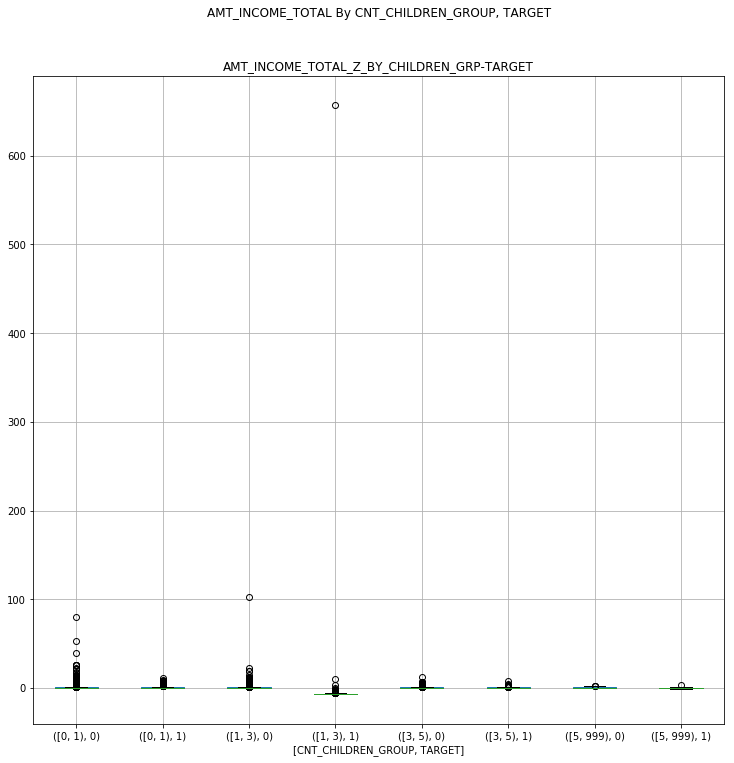

In [40]:
plt_column = ['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL By CNT_CHILDREN_GROUP, TARGET')
plt.show()